In [89]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats

In [90]:
full_data = Path('../Resources/full_data.csv')
manufacturer_data = Path('../Resources/vaccinations-by-manufacturer.csv')
populations_data = Path('../Resources/world-population-data.csv')

In [91]:
full_data = pd.read_csv(full_data)
manufacturer_data = pd.read_csv(manufacturer_data)
pop_data = pd.read_csv(populations_data)

In [92]:
pop_data = pop_data[['location', '2022']]
pop_data.set_index('location')

,2022
location,
Aruba,106445.0
Africa Eastern and Southern,720859132.0
Afghanistan,41128771.0
Africa Western and Central,490330870.0
Angola,35588987.0
...,...
Kosovo,1761985.0
"Yemen, Rep.",33696614.0
South Africa,59893885.0


In [93]:
total_cases = full_data.drop(columns=['new_cases','new_deaths','weekly_cases','weekly_deaths','biweekly_deaths','biweekly_cases'])
total_cases = total_cases.dropna()
total_cases = total_cases.groupby(['location']).max('total_cases')
total_cases = total_cases.rename(columns={'total_cases':'Total Cases', 'total_deaths':'Total Deaths'})
total_cases = pd.DataFrame(total_cases)
drop_values = ['South America','World','High income','Asia','Europe','Upper middle income','European Union','North America','Lower middle income']
total_cases = total_cases.drop(index = drop_values)
top_cases = total_cases.nlargest(n=10,columns='Total Cases')
top_deaths = total_cases.nlargest(n=10,columns='Total Deaths')
total_cases

,Total Cases,Total Deaths
location,,
Afghanistan,233472.0,7985.0
Africa,13140629.0,259098.0
Albania,334863.0,3605.0
Algeria,272023.0,6881.0
American Samoa,8359.0,34.0
...,...,...
Vietnam,11624000.0,43206.0
Wallis and Futuna,3760.0,9.0
Yemen,11945.0,2159.0


In [94]:
manufacturer_data = manufacturer_data.groupby(['location','vaccine']).max('total_vaccinations')
manufacturer_data

total_vaccinations
location      vaccine                               
Argentina     CanSino                         989067
              Moderna                       18714178
              Oxford/AstraZeneca            26782388
              Pfizer/BioNTech               20715299
              Sinopharm/Beijing             28986044
...                                              ...
United States Novavax                          83047
              Pfizer/BioNTech              401685954
Uruguay       Oxford/AstraZeneca               92168
              Pfizer/BioNTech                2577190
              Sinovac                        3249551

[227 rows x 1 columns]

In [95]:
manufacturer_data = manufacturer_data.groupby('location').sum('total_vaccinations')
manufacturer_data = manufacturer_data.rename(columns={'total_vaccinations':'Total Vaccinations'})
manufacturer_data = manufacturer_data.drop(index = 'European Union')
top_vax = manufacturer_data.nlargest(n=10,columns='Total Vaccinations')
low_vax = manufacturer_data.nsmallest(n=10,columns='Total Vaccinations')

In [96]:
manufacturer_data

,Total Vaccinations
location,
Argentina,116978521
Austria,20459016
Belgium,29617119
Bulgaria,4616938
Canada,95155135
Chile,34560792
Croatia,5416888
Cyprus,1797604
Czechia,19047865


In [97]:
vax_case_ratio = pd.merge(total_cases, manufacturer_data, how='inner', on='location')
vax_case_ratio['Vaccinations:Cases'] = vax_case_ratio['Total Vaccinations'] / vax_case_ratio['Total Cases']
vax_case_ratio['Vaccinations:Deaths'] = vax_case_ratio['Total Vaccinations'] / vax_case_ratio['Total Deaths']
top_vaxcase_ratio = vax_case_ratio.nlargest(n=10,columns='Vaccinations:Cases')
top_vaxdeath_ratio = vax_case_ratio.nlargest(n=10,columns='Vaccinations:Deaths')
vax_case_ratio.head()

,Total Cases,Total Deaths,Total Vaccinations,Vaccinations:Cases,Vaccinations:Deaths
location,,,,,
Argentina,10131173.0,130853.0,116978521,11.546395,893.968965
Austria,6082343.0,22534.0,20459016,3.363674,907.917636
Belgium,4861393.0,34339.0,29617119,6.092311,862.492181
Bulgaria,1329225.0,38700.0,4616938,3.473406,119.300724
Canada,4789387.0,54282.0,95155135,19.867915,1752.977691


In [98]:
vax_rates = pd.merge(vax_case_ratio, pop_data, how='left', on='location')
vax_rates['Vaccination Rate'] = vax_rates['Total Vaccinations'] / vax_rates['2022']
# Note that vaccination rate refers to the number of doses administered per person in the population. This does not represent a percent of the population.
vax_rates = vax_rates.set_index('location')
vax_rates = vax_rates.dropna()
vax_rates = vax_rates.sort_values('Vaccination Rate', ascending=False)
vax_rates

,Total Cases,Total Deaths,Total Vaccinations,Vaccinations:Cases,Vaccinations:Deaths,2022,Vaccination Rate
location,,,,,,,
Japan,33803572.0,74694.0,383747738,11.352284,5137.597906,125124989.0,3.066915
Peru,4524748.0,220831.0,91412580,20.202800,413.948132,34049588.0,2.684690
Ireland,1735643.0,9593.0,13047558,7.517420,1360.112374,5127170.0,2.544787
Portugal,5643357.0,28143.0,26434504,4.684181,939.292328,10409704.0,2.539410
Belgium,4861393.0,34339.0,29617119,6.092311,862.492181,11685814.0,2.534451
Argentina,10131173.0,130853.0,116978521,11.546395,893.968965,46234830.0,2.530095
Italy,26720158.0,196936.0,144608839,5.411975,734.293573,58940425.0,2.453475
Canada,4789387.0,54282.0,95155135,19.867915,1752.977691,38929902.0,2.444269
Malta,121418.0,905.0,1286538,10.595941,1421.588950,531113.0,2.422343


In [99]:
vax_rates_top = vax_rates.nlargest(n=10,columns='Vaccination Rate')
vax_rates_top
vax_rates_bottom = vax_rates.nsmallest(n=10,columns='Vaccination Rate')
vax_rates_bottom

,Total Cases,Total Deaths,Total Vaccinations,Vaccinations:Cases,Vaccinations:Deaths,2022,Vaccination Rate
location,,,,,,,
Iceland,209928.0,186.0,83137,0.396026,446.973118,382003.0,0.217634
South Africa,4072673.0,102595.0,38050611,9.342908,370.881729,59893885.0,0.635300
Bulgaria,1329225.0,38700.0,4616938,3.473406,119.300724,6465097.0,0.714133
Ukraine,5533407.0,109920.0,31683310,5.725823,288.239720,38000000.0,0.833771
Romania,3526916.0,68715.0,16827486,4.771162,244.888103,19047009.0,0.883471
Croatia,1316878.0,18752.0,5416888,4.113432,288.869881,3855600.0,1.404940
Slovenia,1355872.0,10055.0,2993521,2.207820,297.714669,2111986.0,1.417396
Cyprus,690791.0,1442.0,1797604,2.602240,1246.604716,1251488.0,1.436373
Poland,6662411.0,120709.0,53894706,8.089370,446.484570,36821749.0,1.463665


<Axes: title={'center': 'Countries with the Highest Number of Vaccine Doses Distributed Adjusted for Population'}, xlabel='Country', ylabel='Doses Administered per Person'>

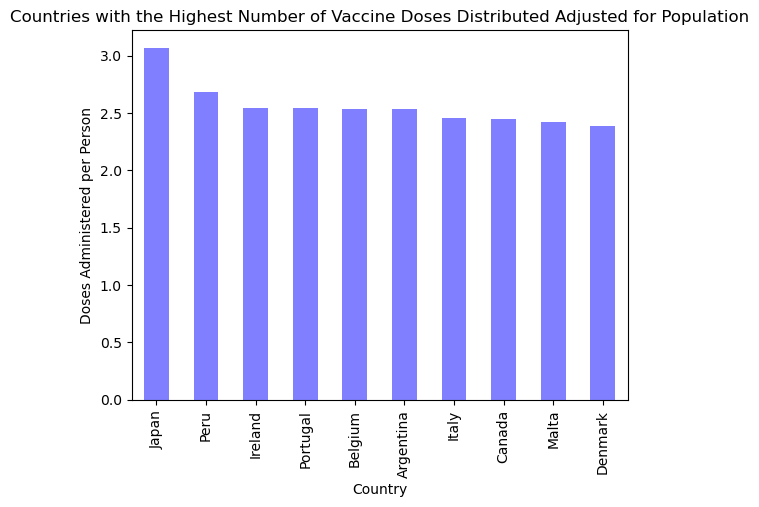

In [100]:
vax_rates_top['Vaccination Rate'].plot(kind='bar',alpha=0.5,color='blue',title='Countries with the Highest Number of Vaccine Doses Distributed Adjusted for Population',xlabel='Country',ylabel='Doses Administered per Person')

<Axes: title={'center': 'Countries with the Lowest Number of Vaccine Doses Distributed Adjusted for Population'}, xlabel='Country', ylabel='Doses Administered per Person'>

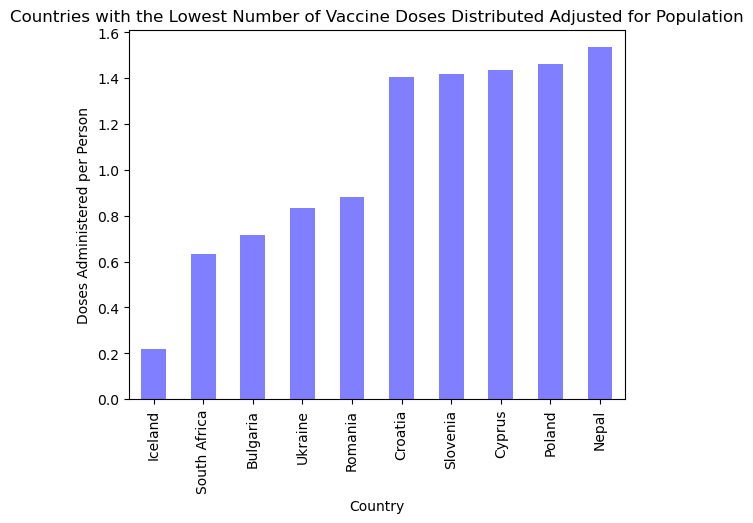

In [101]:
vax_rates_bottom['Vaccination Rate'].plot(kind='bar',alpha=0.5,color='blue',title='Countries with the Lowest Number of Vaccine Doses Distributed Adjusted for Population',xlabel='Country',ylabel='Doses Administered per Person')

<Axes: >

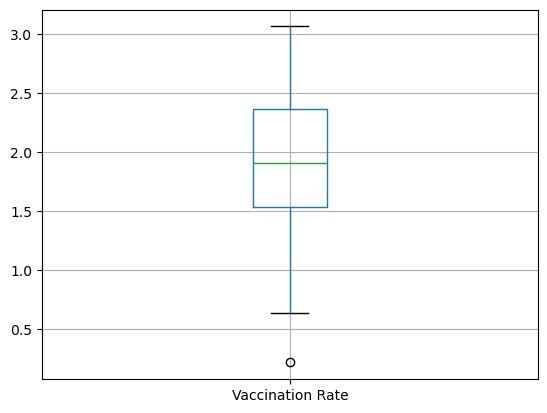

In [102]:
vax_rates.boxplot(column='Vaccination Rate')

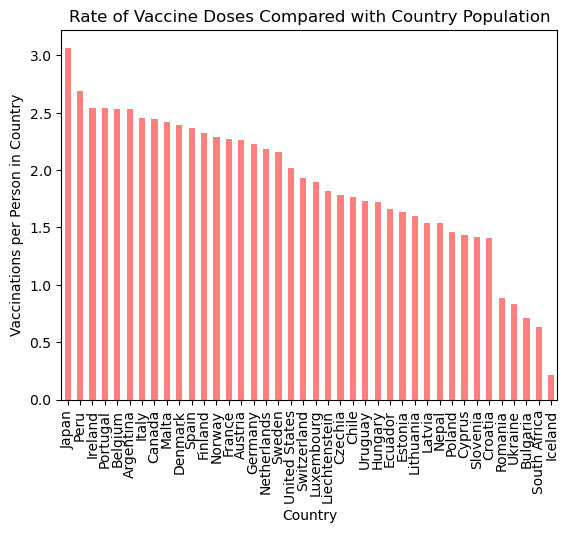

In [103]:
vax_rate_chart = vax_rates['Vaccination Rate'].plot(kind='bar',alpha=0.5,color='red', use_index=True, title='Rate of Vaccine Doses Compared with Country Population', xlabel='Country', ylabel='Vaccinations per Person in Country')

# Top Covid Cases
This is a list of the top ten countries with the highest count of Covid cases. The US had the highest number of cases at just over 100 million (1.03x10^8). Following shortly after was China with just under 100 million (9.94x10^7). A large drop off in cases occurred from here, with the third highest reported cases being India at 4.5x10^7 cases, almost half that of China or the US. There is little variation between the rest of the top ten highest cases, with the United Kingdom having a total of 2.49x10^7 cases in the lowest position.

,Total Cases,Total Deaths
location,,
United States,103436829.0,1186079.0
China,99351758.0,122170.0
India,45036197.0,533581.0
France,38997490.0,168091.0
Germany,38437756.0,174979.0
Brazil,37519960.0,702116.0
South Korea,34571873.0,35934.0
Japan,33803572.0,74694.0
Italy,26720158.0,196936.0


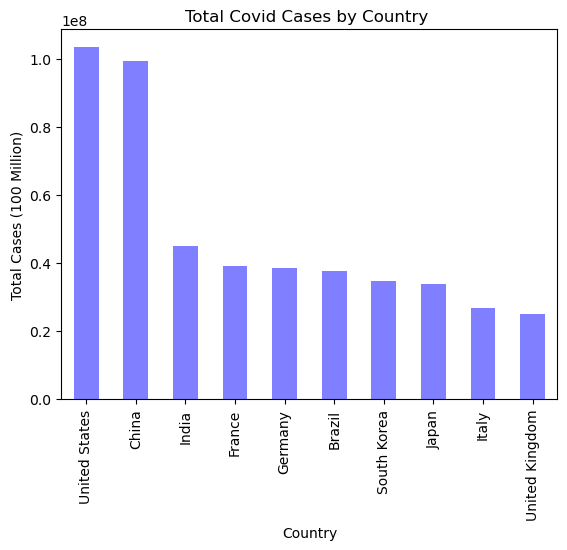

In [104]:
top_cases_chart = top_cases['Total Cases'].plot(kind='bar', color='blue', alpha=0.5, xlabel='Country', ylabel='Total Cases (100 Million)', title='Total Covid Cases by Country ')
top_cases.head(10)

# Top Covid Deaths by Country
The chart below shows the top ten countries with the highest number of cases, and how many deaths they had within those countries. The United States had the highest number of deaths out of the top ten countries with the most covid cases, with the total number of deaths at 1.19x10^6. Germany had the lowest number of deaths at 1.75x10^5. The second highest number of deaths was Brazil (out of the top ten cases), but was almost 5.0x10^5 lower than the US (7.02x10^5).

In [105]:
vax_rates['Death Rate'] = vax_rates['Total Deaths'] / vax_rates['2022'] * 100
vax_rates.nlargest(n=10,columns='Death Rate')

,Total Cases,Total Deaths,Total Vaccinations,Vaccinations:Cases,Vaccinations:Deaths,2022,Vaccination Rate,Death Rate
location,,,,,,,,
Peru,4524748.0,220831.0,91412580,20.202800,413.948132,34049588.0,2.684690,0.648557
Bulgaria,1329225.0,38700.0,4616938,3.473406,119.300724,6465097.0,0.714133,0.598599
Hungary,2230351.0,49051.0,16584107,7.435649,338.099264,9643048.0,1.719799,0.508667
Croatia,1316878.0,18752.0,5416888,4.113432,288.869881,3855600.0,1.404940,0.486358
Slovenia,1355872.0,10055.0,2993521,2.207820,297.714669,2111986.0,1.417396,0.476092
Czechia,4759172.0,43503.0,19047865,4.002349,437.851757,10672118.0,1.784825,0.407632
Latvia,977701.0,7465.0,2896153,2.962207,387.964233,1879383.0,1.541013,0.397205
Romania,3526916.0,68715.0,16827486,4.771162,244.888103,19047009.0,0.883471,0.360765
United States,103436829.0,1186079.0,672612680,6.502642,567.089275,333287557.0,2.018115,0.355873


# Death Rate Based on Cases
The graph below shows the death rate by comparing the number of deaths to the number of cases. This is a percent that was found by dividing the number of deaths by the number of cases. This data is using the ten countries with highest number of cases. Despite having the highest number of cases, and the highest number of deaths, the proportion of deaths compared with cases was low for the US. The US ranked 7th out of the countries with the most cases, with a death rate of 1.15%. Peru had the highest ratio of deaths to cases, with a death rate of 4.88%, and Mexico similarly in second place at 4.34%. A drop in death rate occurs from here with Africa in 3rd at 1.97%. Out of the countries with the highest cases, Germany is ranked 10th for death rate at 0.46%.

,Total Cases,Total Deaths,Death Rate
location,,,
Peru,4524748.0,220831.0,4.880515
Mexico,7709747.0,335011.0,4.345292
Africa,13140629.0,259098.0,1.971732
Brazil,37519960.0,702116.0,1.871313
Russia,24132649.0,402705.0,1.668714
India,45036197.0,533581.0,1.184783
United States,103436829.0,1186079.0,1.146670
United Kingdom,24920037.0,232112.0,0.931427
Italy,26720158.0,196936.0,0.737032


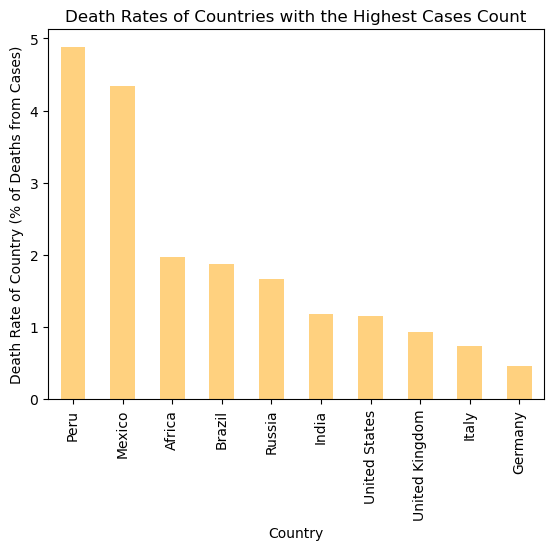

In [106]:
top_deaths['Death Rate'] = top_deaths['Total Deaths'] / top_deaths['Total Cases'] *100
top_death_rate = top_deaths.sort_values(by='Death Rate', ascending=False)
death_rate_chart = top_death_rate['Death Rate'].plot(kind='bar',alpha=0.5,color='orange',title='Death Rates of Countries with the Highest Cases Count',xlabel='Country',ylabel='Death Rate of Country (% of Deaths from Cases)')
top_death_rate.head(10)

# Countries with the Highest Levels of Vaccinations
The chart below depicts the ten countries with the highest levels of vaccination in the world. This data shows the total number of vaccines distributed, not necessarily the number of individuals that received a vaccine. This is an aggregate of the different vaccine brands that were available in each country. The United States was number 1 in this category, with 6.72x10^8 vaccine doses given. The second highest number of vaccine doses distributed was Japan with 3.84x10^8 doses. The next 8 countries had similar counts to one another ranging from 1.87x10^8 doses (Germany) to 8.75x10^7 doses (South Korea).

,Total Vaccinations
location,
United States,672612680
Japan,383747738
Germany,186523169
France,154493266
Italy,144608839
Argentina,116978521
Spain,112969821
Canada,95155135
Peru,91412580


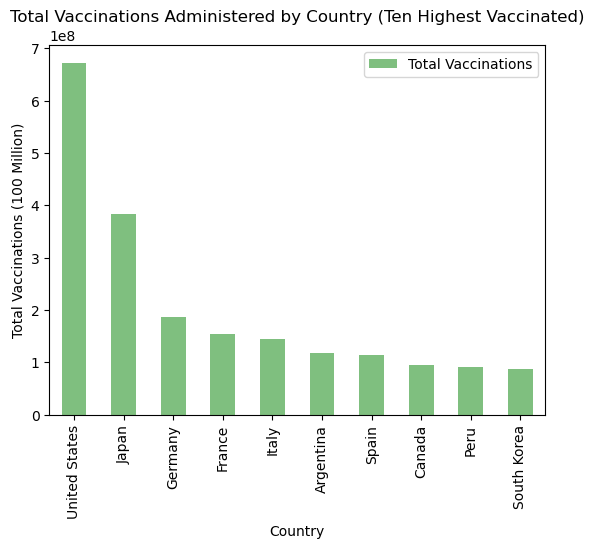

In [107]:
top_vax_chart = top_vax.plot(kind='bar',color='green',alpha=0.5,xlabel='Country',ylabel='Total Vaccinations (100 Million)', title='Total Vaccinations Administered by Country (Ten Highest Vaccinated)')
top_vax.head(10)

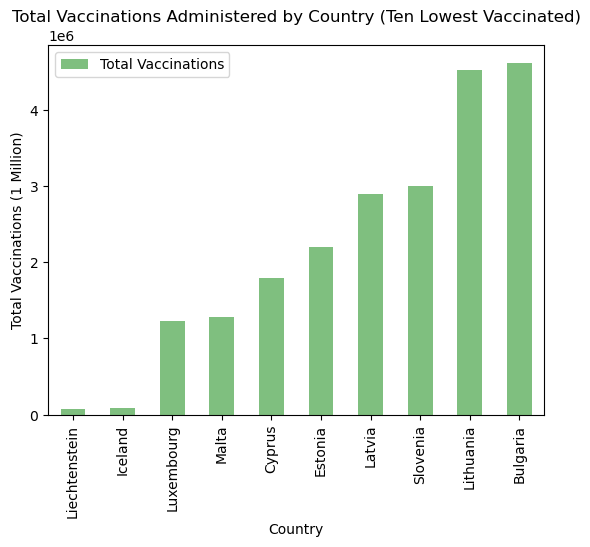

In [108]:
low_vax_chart = low_vax.plot(kind='bar',color='green',alpha=0.5,xlabel='Country',ylabel='Total Vaccinations (1 Million)', title='Total Vaccinations Administered by Country (Ten Lowest Vaccinated)')

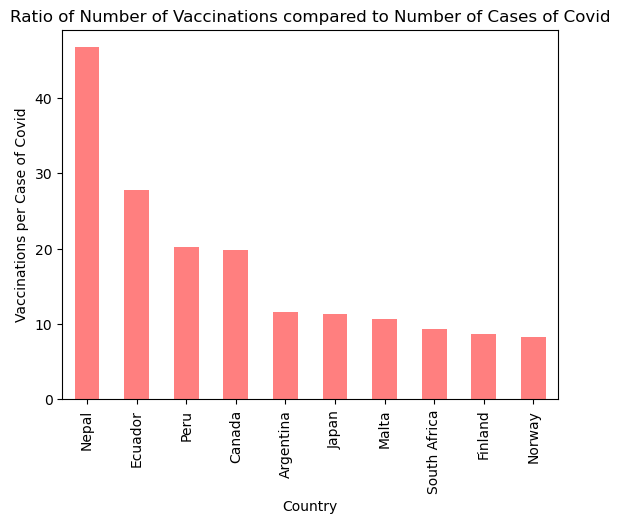

In [109]:
vax_case_plot = top_vaxcase_ratio['Vaccinations:Cases'].plot(kind='bar',title='Ratio of Number of Vaccinations compared to Number of Cases of Covid', xlabel='Country',ylabel='Vaccinations per Case of Covid', color='red',alpha=0.5)

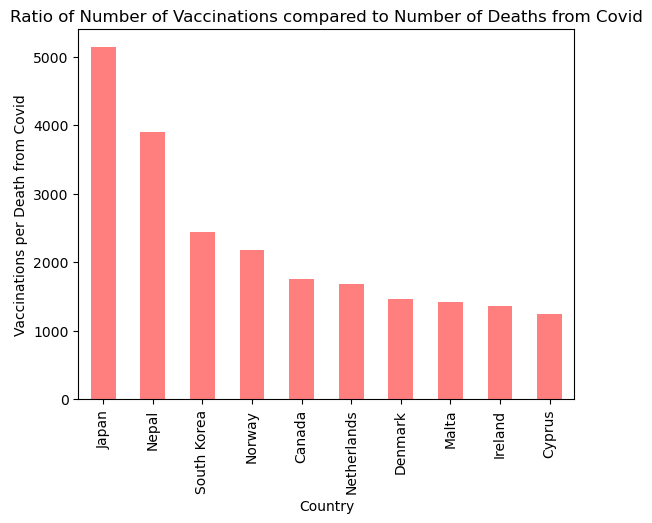

In [110]:
vax_death_plot = top_vaxdeath_ratio['Vaccinations:Deaths'].plot(kind='bar',title='Ratio of Number of Vaccinations compared to Number of Deaths from Covid', xlabel='Country',ylabel='Vaccinations per Death from Covid', color='red',alpha=0.5)

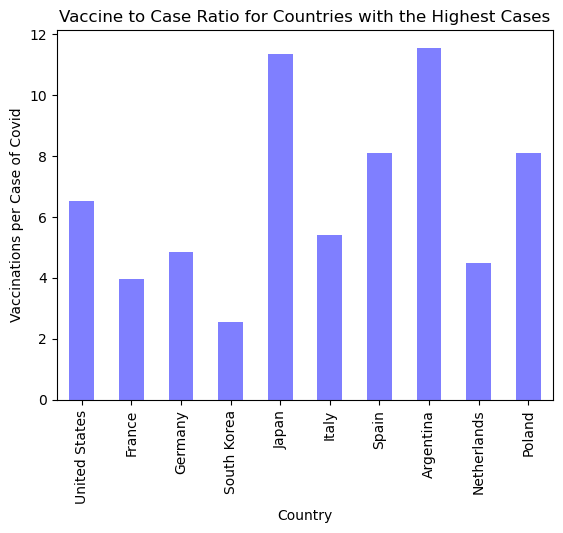

In [111]:
top_caseratio_chart = vax_case_ratio.nlargest(n=10,columns='Total Cases')
top_caseratio_chart = top_caseratio_chart['Vaccinations:Cases'].plot(kind='bar',color='blue',alpha=0.5,title='Vaccine to Case Ratio for Countries with the Highest Cases', xlabel='Country',ylabel='Vaccinations per Case of Covid')